# Multiple Linear Regression
---

## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

In [1]:
import warnings
warnings.filterwarnings("ignore")
from ml_utils import *
import sys

In [2]:
#Display settings
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [3]:
#Load the dataset
df = pd.read_csv("Housing.csv")

In [4]:
#Visual overview of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 1. Data Overview

**Shape of the Dataset:**

(545, 13)
-----------------




**Number of rows and columns in the Dataset:**

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
-----------------




**Basic information of the Dataset:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
-----------------




**Percentage null values in the Dataset:**

furnishingstatus    0.0
prefarea            0.0
parking             0.0
airconditioning     0.0
hotwaterheating     0.0
basement            0.0
guestroom           0.0
mainroad            0.0
stories             0.0
bathrooms           0.0
bedrooms            0.0
area                0.0
price               0.0
dtype: float64
-----------------




**Total number of duplicated rows in the Dataset:**

0
-----------------




**Categorical columns in the Dataset:**

['mainroad', 'hotwaterheating', 'furnishingstatus', 'guestroom', 'basement', 'airconditioning', 'prefarea']
-----------------




**Unique values across categorical columns in the Dataset:**

Unique values in the column:  mainroad
{'yes': 468, 'no': 77}
-----------------


Unique values in the column:  hotwaterheating
{'no': 520, 'yes': 25}
-----------------


Unique values in the column:  furnishingstatus
{'semi-furnished': 227, 'unfurnished': 178, 'furnished': 140}
-----------------


Unique values in the column:  guestroom
{'no': 448, 'yes': 97}
-----------------


Unique values in the column:  basement
{'no': 354, 'yes': 191}
-----------------


Unique values in the column:  airconditioning
{'no': 373, 'yes': 172}
-----------------


Unique values in the column:  prefarea
{'no': 417, 'yes': 128}
-----------------


-----------------




**Visual representation of the Dataset:**

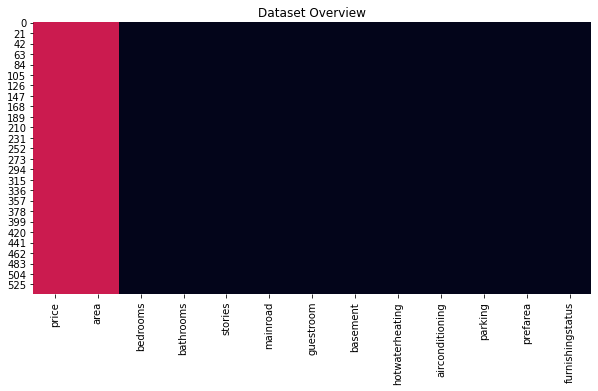

 Categorical   Numerical   NaN 


In [5]:
#Get an overview of the Dataset
df_overview(df, max_cat=20, figsize=(10,5))

## 2. Exploratory Data Analysis

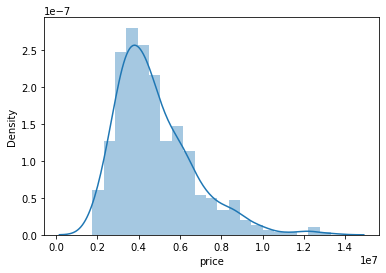

In [6]:
ax = sns.distplot(df['price'])

In [7]:
df['price'].describe().round(2)

count         545.00
mean      4766729.25
std       1870439.62
min       1750000.00
25%       3430000.00
50%       4340000.00
75%       5740000.00
max      13300000.00
Name: price, dtype: float64

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 3. Data Pre-Processing

**3.1 Binary mapping for categorical columns**

In [9]:
#Add Binary mapping to categorical columns
col_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
val_list = ["no", "yes"]
df = add_mapping(df, col_list, val_list)

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


**3.2 Dummy variables for categorical data with > 2 entries**

In [11]:
#Get dummy variables
df = add_dummies(df, x="furnishingstatus", dropx=True)

  furnishingstatus  furnishingstatus_semi-furnished  \
0        furnished                                0   
1        furnished                                0   
2   semi-furnished                                1   
3        furnished                                0   
4        furnished                                0   

   furnishingstatus_unfurnished  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  


In [12]:
#Visualize the dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


**3.3 Split the data into train and test data**

In [13]:
#Split the train and test data
df_train, df_test = df_partitioning(df, test_size=0.3, random_state=23, shuffle=True)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


**3.4 Scale the numerical data**

In [14]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train_scaled, df_test_scaled = scaling(df_train, df_test, num_vars)

In [15]:
df_train_scaled.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
448,0.121212,0.168041,0.2,0.000000,0.0,1,0,0,0,0,0.666667,0,1,0
82,0.421212,0.608247,0.4,0.333333,0.0,1,0,1,0,1,0.333333,1,0,0
59,0.472727,0.298969,0.4,0.333333,1.0,1,1,0,0,1,0.333333,0,0,0
414,0.144848,0.164261,0.2,0.000000,0.0,1,0,0,0,0,0.000000,0,0,1
110,0.375758,0.340206,0.4,0.000000,0.0,1,1,1,0,0,0.666667,1,1,0


**3.5 Split x and y from scaled train-test set**

In [16]:
y_train = df_train_scaled.pop('price')
X_train = df_train_scaled

In [17]:
y_test = df_test_scaled.pop('price')
X_test = df_test_scaled

In [18]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
404,0.223368,0.4,0.000000,0.333333,0,0,0,0,0,0.000000,0,0,1
314,0.164261,0.2,0.000000,0.333333,1,0,0,0,0,0.333333,0,1,0
363,0.132921,0.2,0.000000,0.000000,1,0,0,1,0,0.000000,0,1,0
271,0.017526,0.8,0.000000,0.333333,0,0,1,0,0,0.000000,0,1,0
19,0.327835,0.4,0.333333,0.333333,1,0,0,0,1,0.333333,1,1,0


In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(381, 13)
(381,)
(164, 13)
(164,)


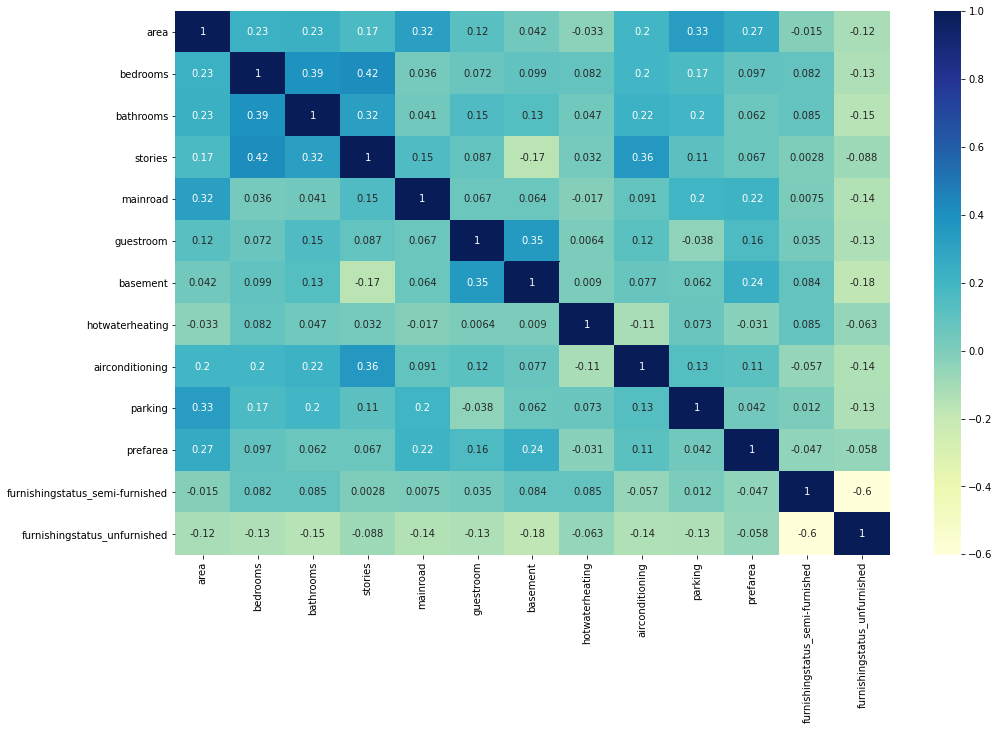

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated
corr_matrix(X_train)

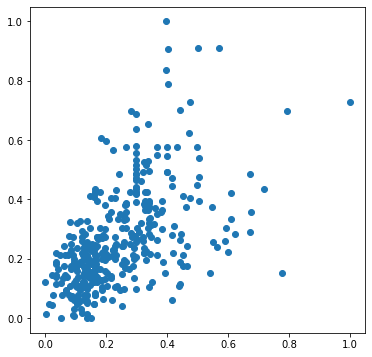

In [43]:
#Visualize the scatter plot for area (x-axis) and price (y-axis)
scatter_plot(X_train["area"], y_train)

## Step 4: Building a linear model using Statsmodels

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

**4.1 Create the model**

In [24]:
import statsmodels.api as sm

# Add a constant
X_train = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train).fit()

**4.2 Get the model parameters**

In [25]:
# Check the parameters obtained
lr.params

const                              0.024398
area                               0.321470
bedrooms                           0.042060
bathrooms                          0.230577
stories                            0.128764
mainroad                           0.035148
guestroom                          0.009877
basement                           0.031768
hotwaterheating                    0.090682
airconditioning                    0.076526
parking                            0.082058
prefarea                           0.059115
furnishingstatus_semi-furnished   -0.006994
furnishingstatus_unfurnished      -0.043927
dtype: float64

**4.3 Get the model summary**

In [26]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     64.61
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.98e-86
Time:                        17:18:44   Log-Likelihood:                 363.18
No. Observations:                 381   AIC:                            -698.4
Df Residuals:                     367   BIC:                            -643.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**4.4 Get the model residuals**

In [27]:
lr.resid

448   -0.048477
82    -0.122312
59    -0.019130
414    0.068013
110    0.041550
         ...   
460   -0.078133
237    0.030183
31     0.128184
488   -0.109677
40     0.135341
Length: 381, dtype: float64

**4.5 Plot the residuals**

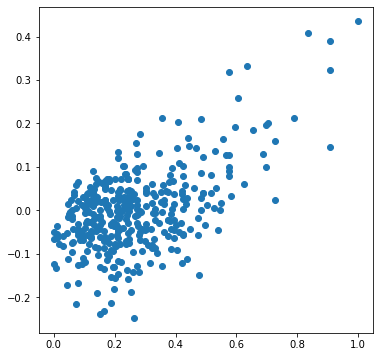

In [28]:
scatter_plot(y_train, lr.resid)

**4.6 Residual Distribution**

In [29]:
y_train_pred = lr.predict(X_train)

Text(0.5, 0, 'Errors')

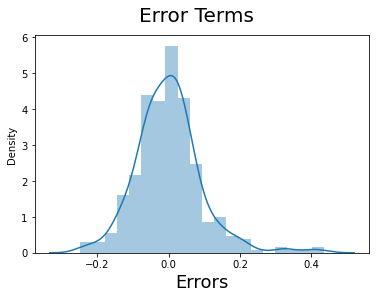

In [30]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## 5. Analysis
Looking at the residual plot and tail of the distribution, we can see that we are `underestimating the prices of expensive houses. `
We need to correctly predict the prices of expensive houses.

## 6. Making predictions on the test set

#### 6.1 Dividing into X_test and y_test

In [31]:
# y_test = x_test.pop('price')
# X_test = x_test

In [32]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [33]:
# Making predictions using the fourth model
y_test_pred = lr.predict(X_test)

## Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_test_pred')

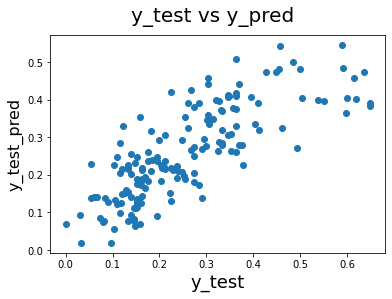

In [38]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

Text(0, 0.5, 'y_test - y_test_pred')

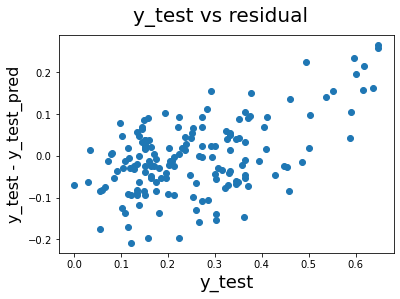

In [41]:
fig = plt.figure()
plt.scatter(y_test, y_test - y_test_pred)
fig.suptitle('y_test vs residual', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test - y_test_pred', fontsize = 16) 

## Step 8: Using sklearn

In [44]:
#Use scikit learn
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
print('coefficients: ', regr.coef_)

coefficients:  [ 0.          0.3214704   0.04205963  0.23057657  0.12876353  0.03514808
  0.00987679  0.03176838  0.090682    0.07652567  0.08205785  0.05911517
 -0.00699429 -0.04392725]


In [46]:
#Prediction
print('Residual Square Error : %.2f' % regr.score(X_test, y_test))

Residual Square Error : 0.62
